In [41]:
%matplotlib inline
from modsim import *

In [54]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
J= UNITS.joules

In [88]:
condition = Condition(g = 9.8 * m/s**2,
            y=5 *m,
            v_init=0 *m/s,
            t0=0*s,
            duration = 10*s,
            mass=1*kg,
            dt=11)

In [94]:
def make_system(condition):
    unpack(condition)
    
    te = mass*g*y + 0.5*mass*v_init**2
    init=State(y=y, v=v_init)
#    ts=linspace(0*s, duration, dt)
    
    return System(init=init, g=g, te=te, t0=t0)

In [95]:
system=make_system(condition)
system

,value
init,y 5 meter v 0.0 meter / secon...
g,9.8 meter / second ** 2
te,49.0 kilogram * meter ** 2 / second ** 2
t0,0 second


In [96]:
def update(y, t, system):
    
    y, v = state
    unpack(system)
    
    v= sqrt((te-mass*g*y)/(0.5*mass))
    
    return state

    ##we have the values TE, 

In [ ]:
def run_simulation(system, update_func):
    results=TimeSeries()
    results[system.t0]=system.y
    for t in linrange(system.t0, system.duration):
        results[t+1] = update(results[t],t,system)

In [87]:
system = make_system(condition)
update(system.init, system)

run_simulation(system, update)

NameError: name 'run_simulation' is not defined

In [46]:
def slope_func(state, t, system):
    
    y,v = state
    unpack (system)
    
    dydt=v
    dvdt=-g
    
    return dydt, dvdt

In [47]:
run_odeint(system, slope_func)

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [50]:
system.resultsplot_position(system.results)

,y,v
0.0,5.000000e+00,0.000000
1.0,1.000000e-01,-9.800000
2.0,5.597420e-10,-9.899496
3.0,1.446685e+02,241.641538
4.0,1.768608e+02,227.006154
5.0,2.090531e+02,208.189231
6.0,2.412454e+02,185.190769
7.0,2.734377e+02,158.010769
8.0,3.056300e+02,126.649231
9.0,3.378224e+02,91.106154


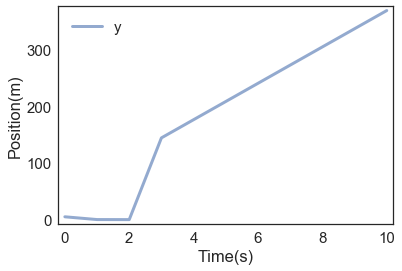

In [51]:
plot_position(system.results)

In [49]:
y=system.results.y
T=interp_inverse(y, kind="cubic")

In [36]:
T_sidewalk=T(0)
T_sidewalk

array(1.0152850475092237)

In [31]:
condition.set(duration=T_sidewalk)
system=make_system(condition)

run_odeint(system, slope_func)

In [32]:
system.results

,y,v
0.000000,5.000000,0.000000
0.101529,4.949491,-0.994979
0.203057,4.797962,-1.989959
0.304586,4.545416,-2.984938
0.406114,4.191850,-3.979917
0.507643,3.737265,-4.974897
0.609171,3.181662,-5.969876
0.710700,2.525040,-6.964855
0.812228,1.767400,-7.959835
0.913757,0.908740,-8.954814


In [33]:
def plot_position(results):
    newfig()
    plot(results.y, label="y")
    decorate(xlabel = "Time(s)",
             ylabel = "Position(m)")

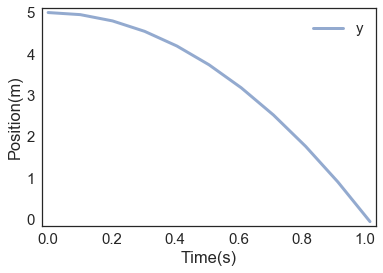

In [34]:
plot_position(system.results)